# Reducing data for use in anomaly detection

Based on work I previously did in the EDA section of my folder.

As always we first import packages we are going to use.

In [34]:
import sys
sys.path.insert(0,'G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Modules/')

import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
from dt import *

In [22]:
try:
    print("Looking for local copy of data...")
    dtn()
    df_p = pd.read_csv("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Data/Process data.gz",compression="gzip",index_col=0)
    stop = end()
    print("Data fetched locally in "+stop)
except OSError as e:
    if e.errno == 2:
        print("No Local data found. Importing from the web.")
        dtn()
        df_p = pd.read_csv("https://www.dropbox.com/s/c065rcq72abzm0s/Process_data.gz?dl=1",compression="gzip")
        stop = end()
        print("Data fetched from web in "+stop)
    else:
        print(e)

Looking for local copy of data...
Data fetched locally in 0:01:06.744264


In [23]:
try:
    print("Looking for local copy of data...")
    dtn()
    df_a = pd.read_csv("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Data/Authentication data.gz",compression="gzip",index_col=0)
    stop = end()
    print("Data fetched locally in "+stop)
except OSError as e:
    if e.errno == 2:
        print("No Local data found. Importing from the web.")
        dtn()
        df_a = pd.read_csv("https://www.dropbox.com/s/c065rcq72abzm0s/Authentication_data.gz?dl=1",compression="gzip")
        stop = end()
        print("Data fetched from web in "+stop)
    else:
        print(e)

Looking for local copy of data...
Data fetched locally in 0:00:20.048408


In [25]:
df_p.head()

,UserName,Device,ProcessName,ParentProcessName,DailyCount
0,Comp748297$,Comp748297,Proc391839.exe,Proc387473,1
1,Comp563664$,Comp563664,rundll32.exe,services,1
2,User607396,Comp609111,Proc417435.exe,Proc417435,1
3,Comp641702$,Comp641702,Proc249569.exe,services,1
4,Comp157389$,Comp157389,Proc402696.exe,services,1


In [26]:
df_a.head()

,UserName,SrcDevice,DstDevice,Authent Type,Failure,DailyCount
0,User035855,Comp808475,Comp081330,TGS,0,17.0
1,Comp655251$,Comp655251,ActiveDirectory,NetworkLogon,0,350.0
2,User762066,Comp306129,ActiveDirectory,TGS,0,22.0
3,User384215,Comp095190,EnterpriseAppServer,NetworkLogon,0,35.0
4,User043263,Comp883307,Comp384394,TGS,0,2.0


In [105]:
x = ["UserName","Device"]
counts_p = []
for i in x:
    z = df_p.groupby(i).size().sort_values(ascending=False)
    z = pd.DataFrame(z)
    z.reset_index(level=0, inplace=True)
    z.columns = [i,'Count']
    counts_p.append(z)

In [106]:
x = ["UserName","SrcDevice","DstDevice"]
counts_a = []
for i in x:
    z = df_a.groupby(i).size().sort_values(ascending=False)
    z = pd.DataFrame(z)
    z.reset_index(level=0, inplace=True)
    z.columns = [i,'Count']
    counts_a.append(z)

In [32]:
counts_p[0]

,UserName,Count
0,Scanner,255383
1,User272607,73934
2,EnterpriseAppServer$,38552
3,Administrator,29443
4,User414014,18593
...,...,...
25315,User711040,1
25316,User296343,1
25317,User464715,1
25318,User126086,1


## Boxplots of Process Data - UserName

<AxesSubplot:xlabel='Count'>

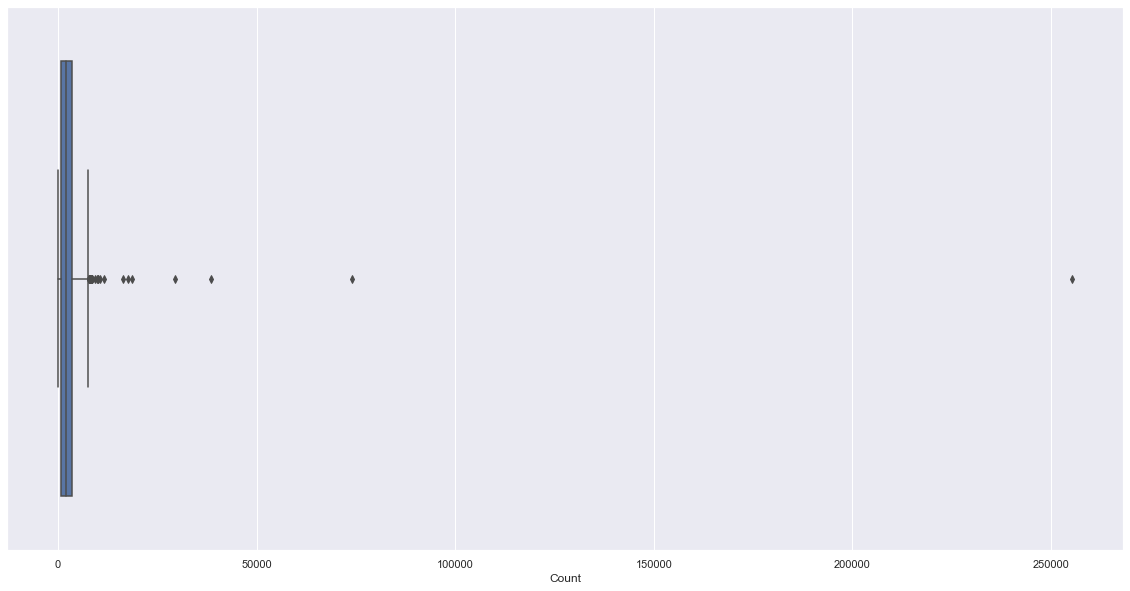

In [56]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=counts_p[0]["Count"])

<AxesSubplot:xlabel='Count'>

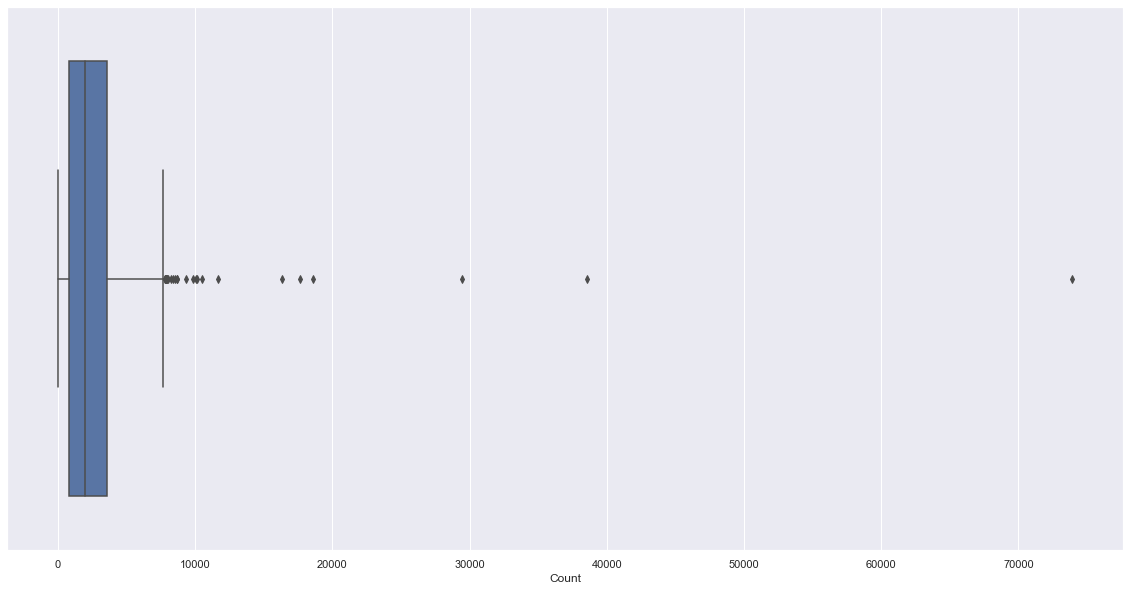

In [57]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=counts_p[0]["Count"][1:])

<AxesSubplot:xlabel='Count'>

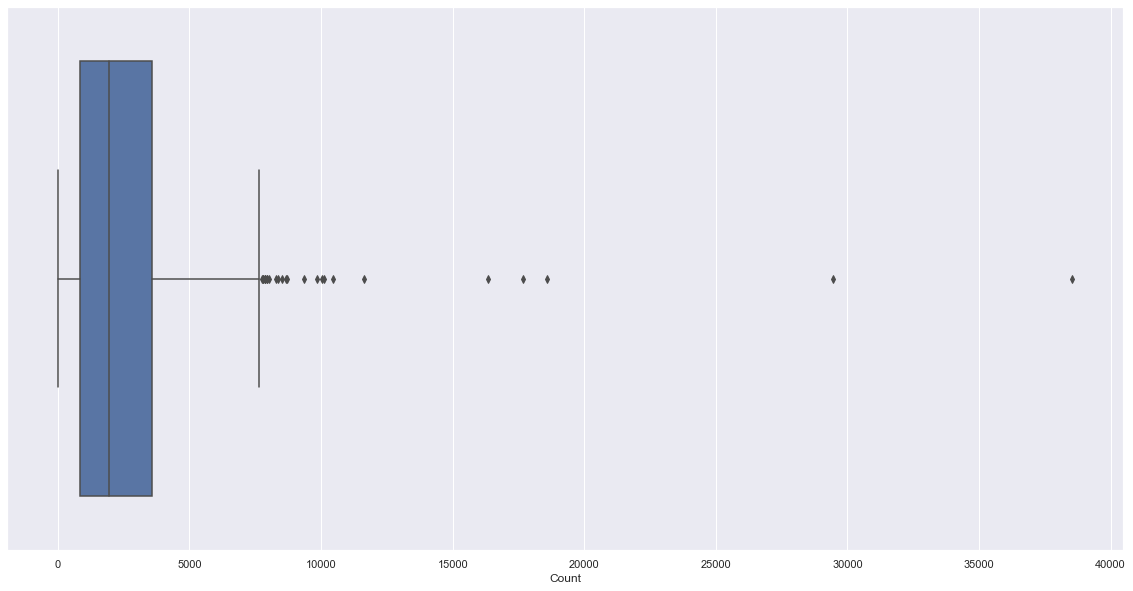

In [58]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=counts_p[0]["Count"][2:])

## Boxplots of Process Data - Device

<AxesSubplot:xlabel='Count'>

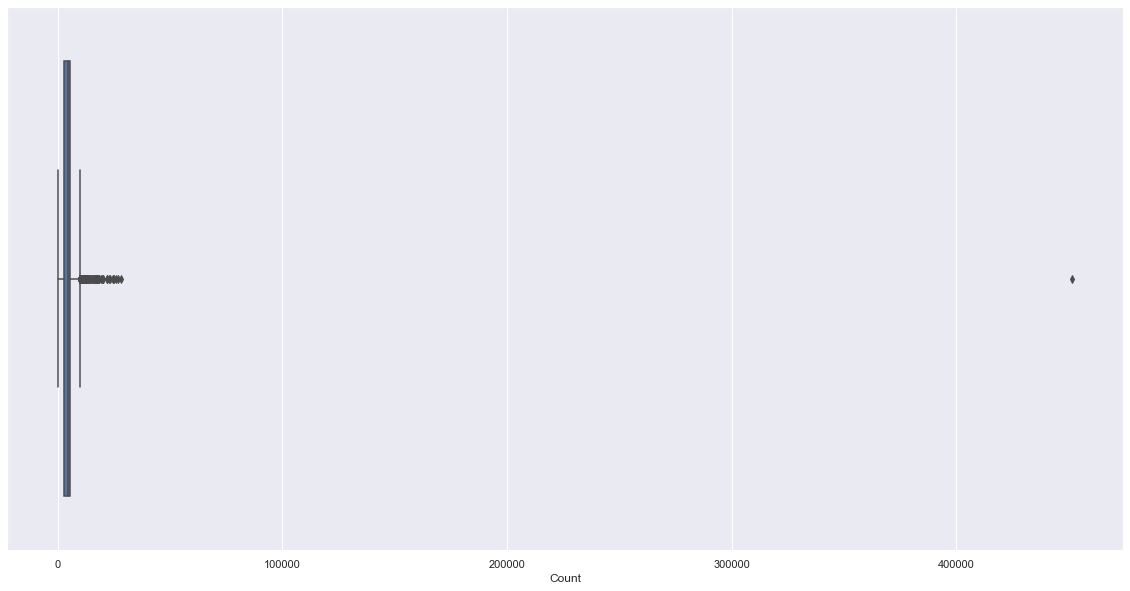

In [59]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=counts_p[1]["Count"])

<AxesSubplot:xlabel='Count'>

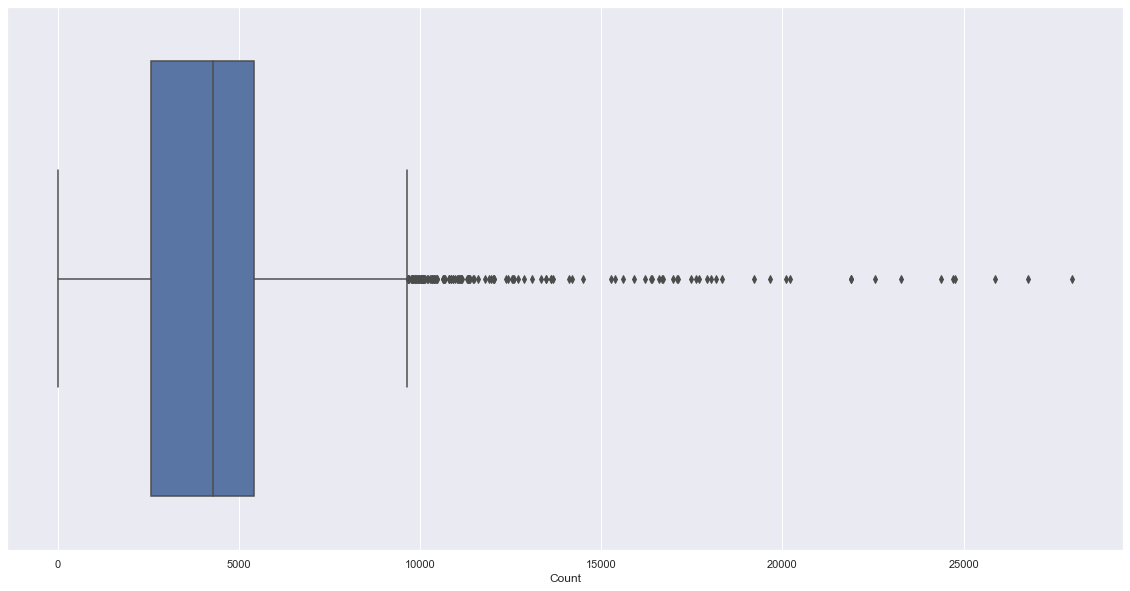

In [60]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=counts_p[1]["Count"][1:])

<AxesSubplot:xlabel='Count'>

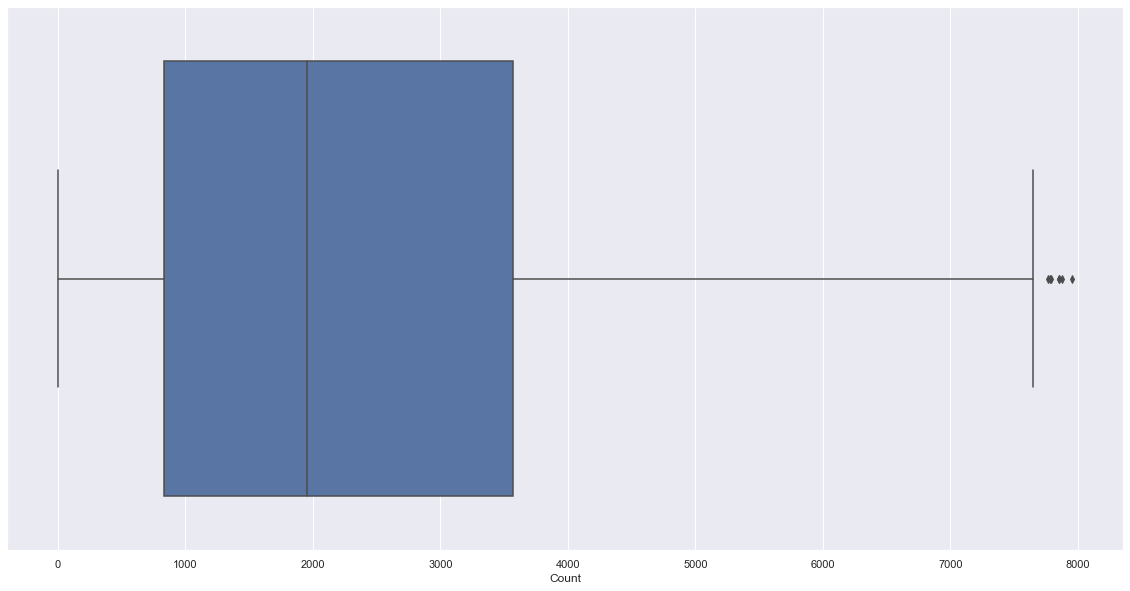

In [61]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=counts_p[0]["Count"][20:])

## Boxplots of Auth Data - UserName

<AxesSubplot:xlabel='Count'>

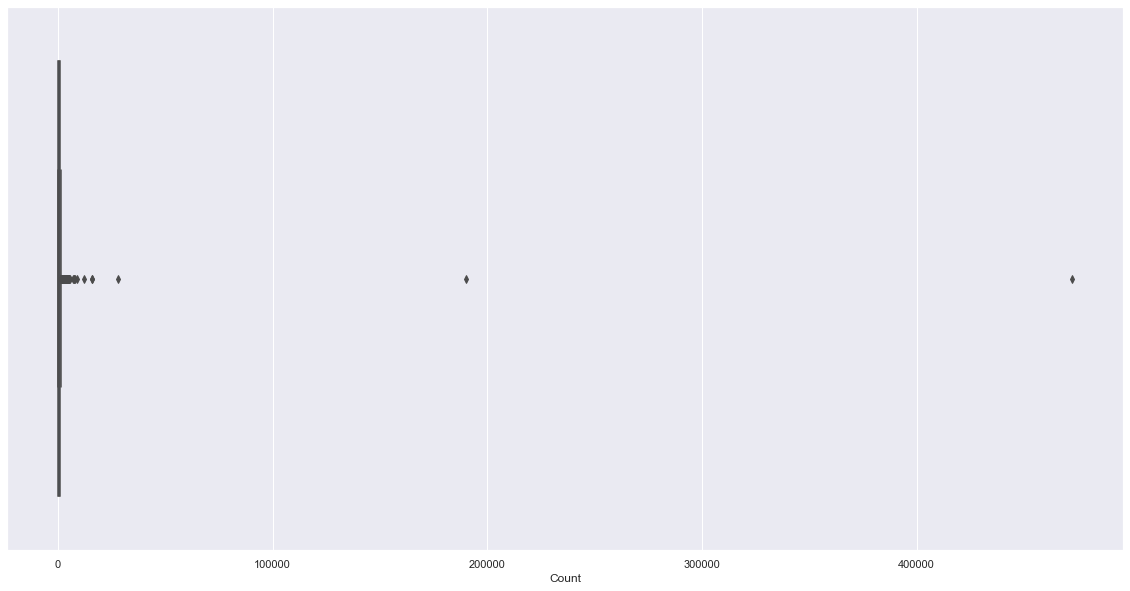

In [62]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=counts_a[0]["Count"])

<AxesSubplot:xlabel='Count'>

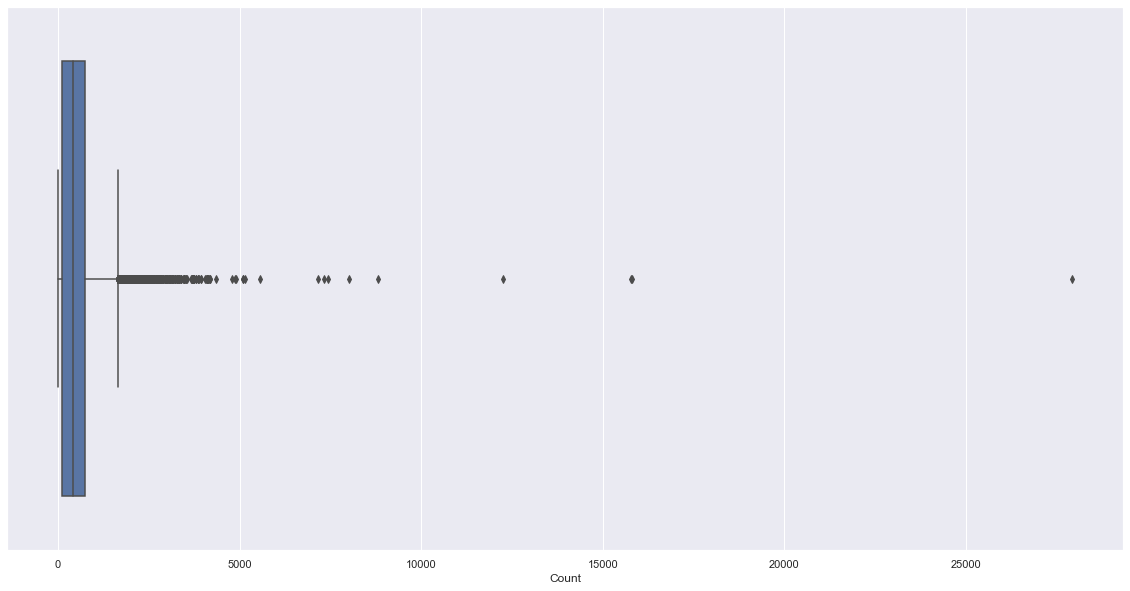

In [63]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=counts_a[0]["Count"][2:])

<AxesSubplot:xlabel='Count'>

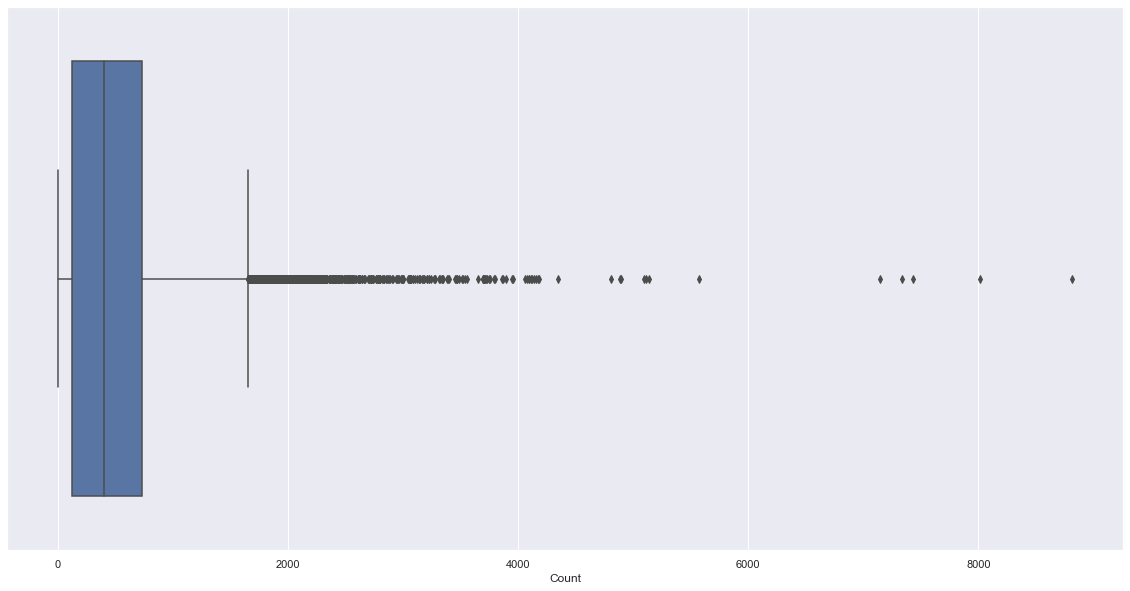

In [64]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=counts_a[0]["Count"][6:])

<AxesSubplot:xlabel='Count'>

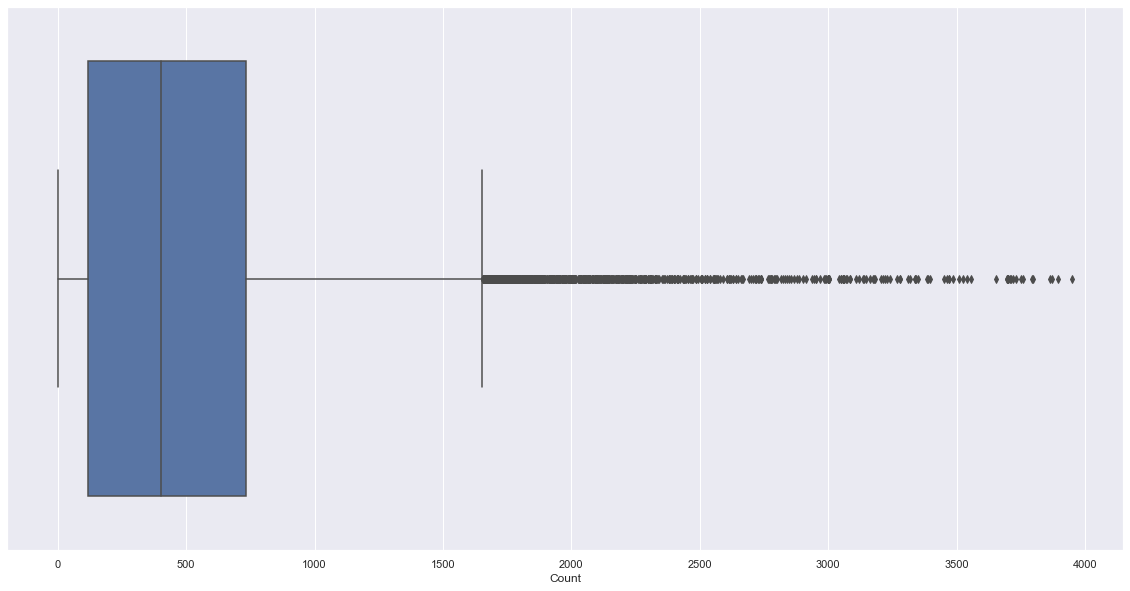

In [65]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=counts_a[0]["Count"][30:])

## Boxplots of Auth Data - SrcDevice

<AxesSubplot:xlabel='Count'>

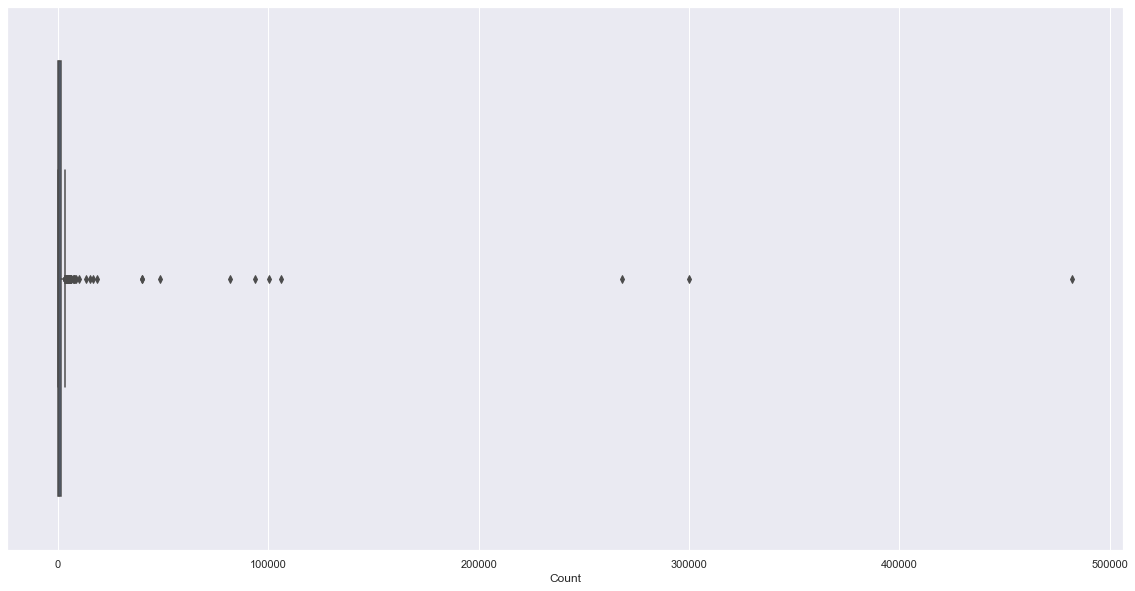

In [71]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=counts_a[1]["Count"])

<AxesSubplot:xlabel='Count'>

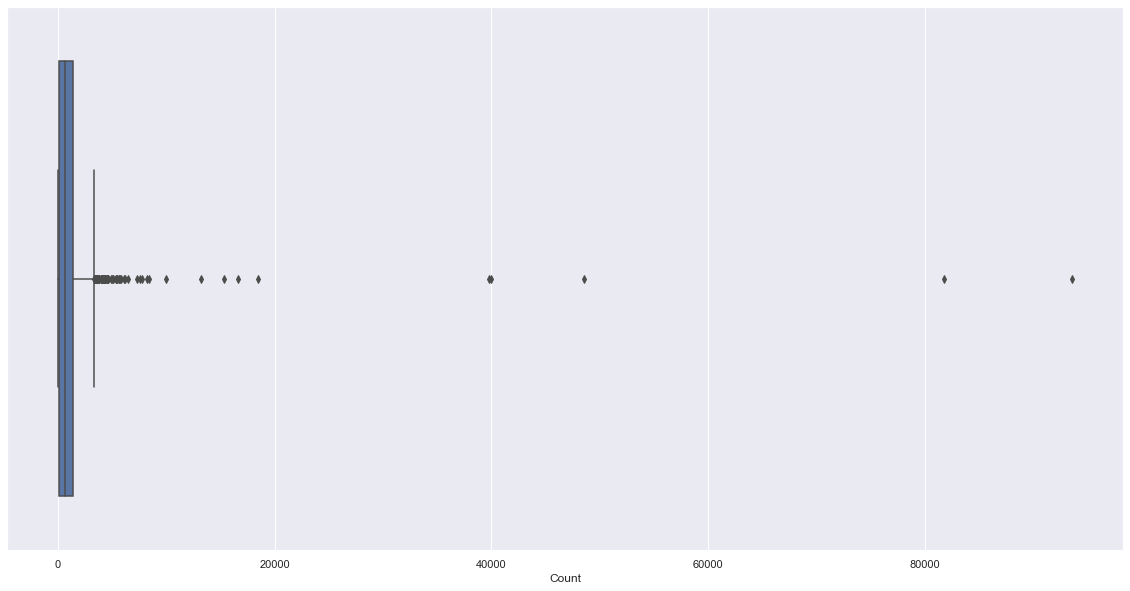

In [72]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=counts_a[1]["Count"][5:])

<AxesSubplot:xlabel='Count'>

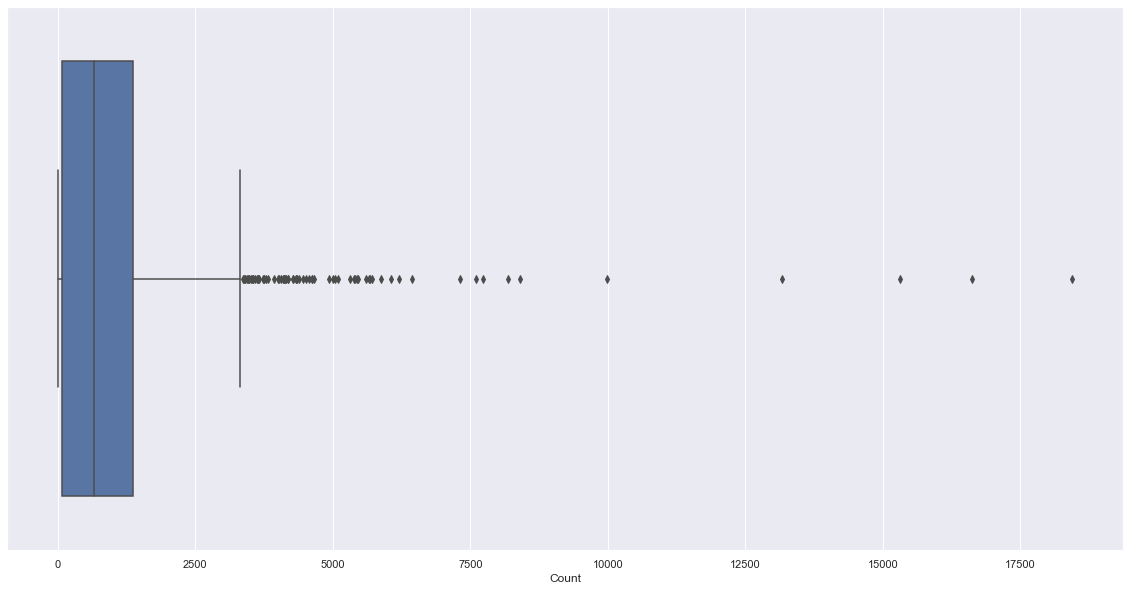

In [73]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=counts_a[1]["Count"][10:])

## Boxplots of Auth Data - DstDevice

<AxesSubplot:xlabel='Count'>

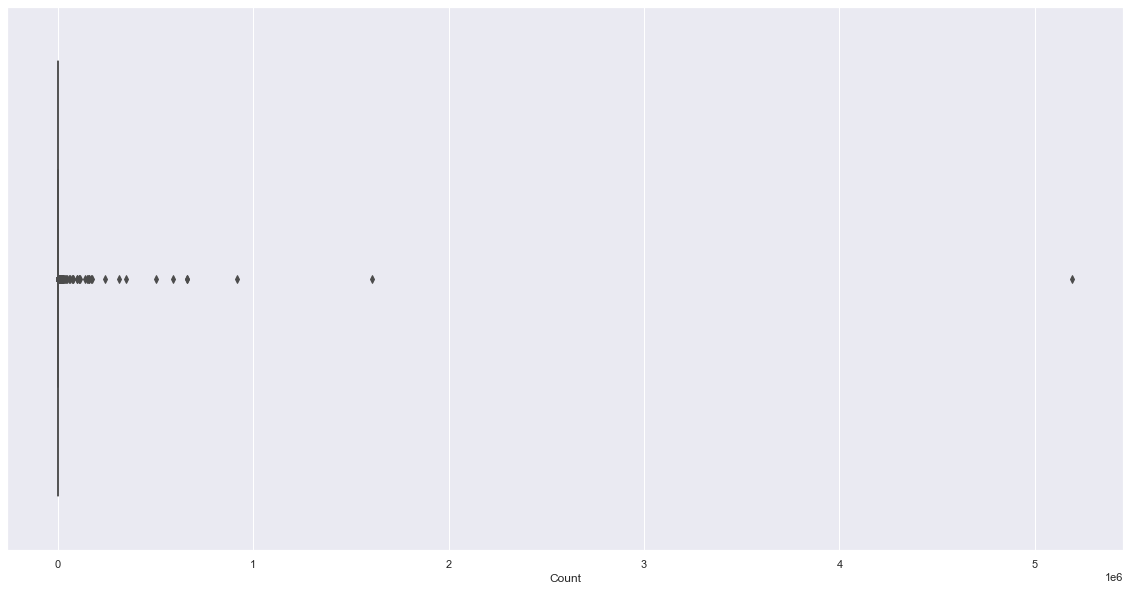

In [74]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=counts_a[2]["Count"])

<AxesSubplot:xlabel='Count'>

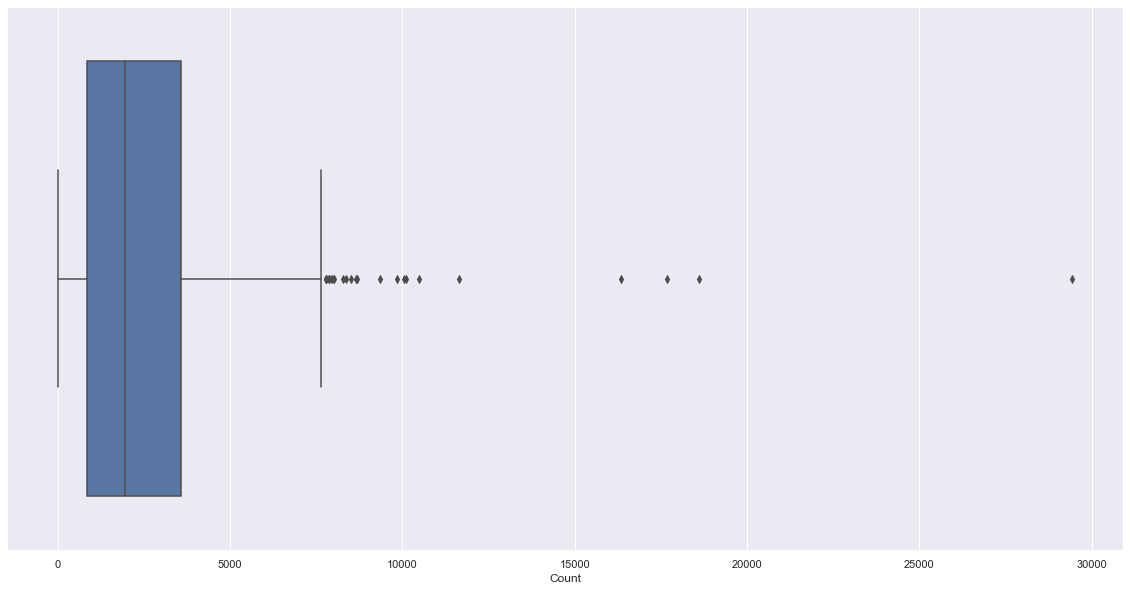

In [76]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=counts_p[0]["Count"][3:])

<AxesSubplot:xlabel='Count'>

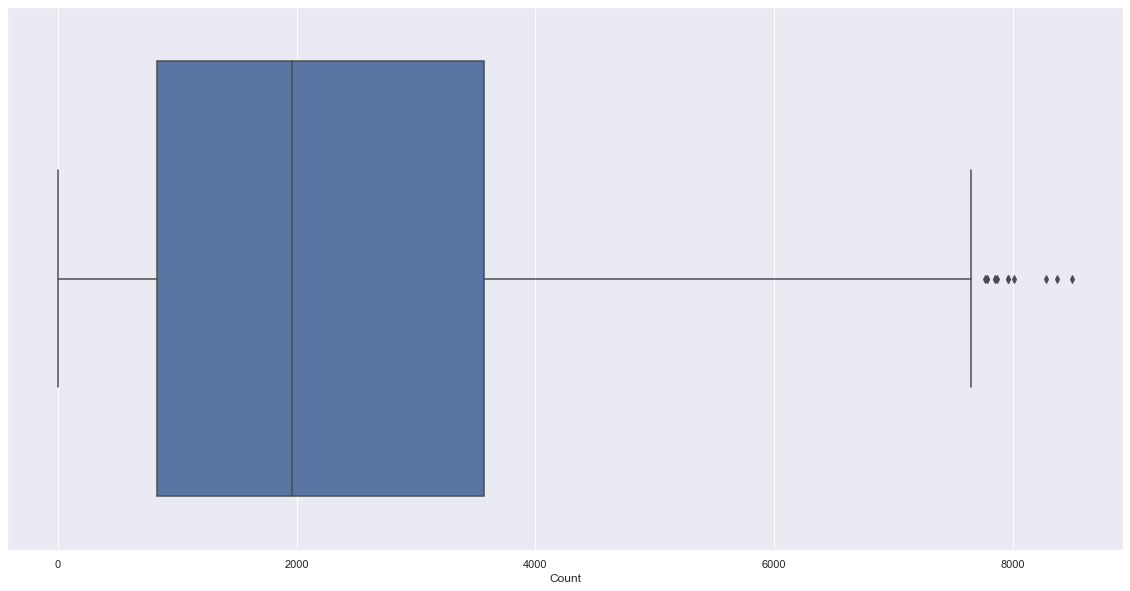

In [77]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=counts_p[0]["Count"][15:])

In [89]:
x = ["UserName","Device"]
counts_p_reduced = []
for i in x:
    z = df_p.groupby(i).size().sort_values(ascending=False)
    z = pd.DataFrame(z)
    z.reset_index(level=0, inplace=True)
    z.columns = [i,'Count']
    z = z[z["Count"] > 1]
    z = z[z["Count"] < z["Count"][0]]
    counts_p_reduced.append(z)

In [87]:
x = ["UserName","Device"]
counts_p_mid_80 = []
for i in x:
    z = df_p.groupby(i).size().sort_values(ascending=False)
    z = pd.DataFrame(z)
    z.reset_index(level=0, inplace=True)
    z.columns = [i,'Count']
    l = len(z)
    l_low = 
    l_high =
    z = z[z["Count"] > ]
    z = z[z["Count"] < ]
    counts_p_mid_80.append(z)

255382

In [160]:
x = ["UserName","Device"]
counts_p_mid_80 = []
counts_p_mid_80_discard = []
for i in x:
    z = df_p.groupby(i).size().sort_values(ascending=False)
    z = pd.DataFrame(z)
    z.reset_index(level=0, inplace=True)
    z.columns = [i,'Count']
    l = len(z)
    print(l)
    l_low = int(l*0.1)
    l_high = int(l*0.9)
    y = z[(z["Count"] <= z["Count"][l_low]) & (z["Count"] >= z["Count"][l_high])]
    x = z[z["Count"] > z["Count"][l_low]]
    v = z[z["Count"] < z["Count"][l_high]]
    counts_p_mid_80.append(y)
    temp = []
    temp.append(x)
    temp.append(v)
    b = pd.concat(temp,axis=0)
    counts_p_mid_80_discard.append(b)

25320
13476


In [164]:
print(len(counts_p_mid_80[0])+len(counts_p_mid_80_discard[0]))

25320


In [170]:
print("Process - UserName - First 5")
print(counts_p_mid_80[0].head())
print("")
print("Process - UserName - Last 5")
print(counts_p_mid_80[0].tail())
print("")
print("Process - Device - First 5")
print(counts_p_mid_80[1].head())
print("")
print("Process - Device - Last 5")
print(counts_p_mid_80[1].tail())

Process - UserName - First 5
         UserName  Count
2532  Comp459452$   4272
2533  Comp819519$   4272
2534   User202994   4272
2535  Comp509630$   4272
2536  Comp416250$   4272

Process - UserName - Last 5
          UserName  Count
22784  Comp324186$    121
22785   User781308    121
22786  Comp748227$    121
22787   User847942    121
22788   User520063    121

Process - Device - First 5
          Device  Count
1347  Comp412116   6584
1348  Comp878158   6584
1349  Comp702752   6584
1350  Comp543700   6582
1351  Comp815841   6582

Process - Device - Last 5
           Device  Count
12124  Comp504154   1092
12125  Comp514047   1090
12126  Comp793786   1089
12127  Comp595745   1089
12128  Comp852830   1087


<AxesSubplot:xlabel='Count'>

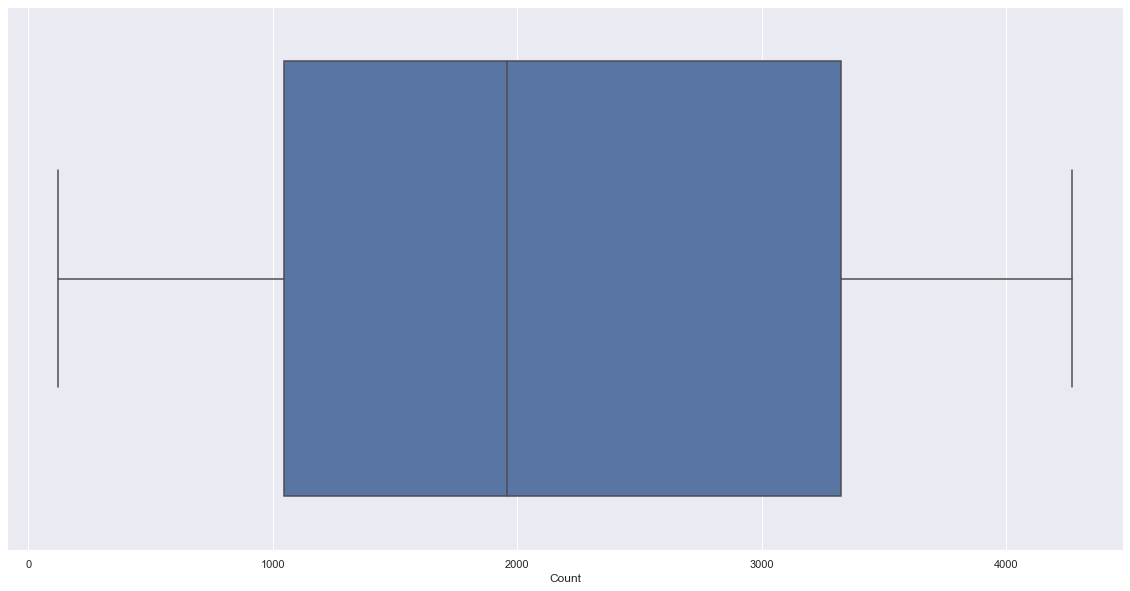

In [131]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=counts_p_mid_80[0]["Count"]:])


In [93]:
counts_p_mid_80[0]

Index(['UserName', 'Device', 'ProcessName', 'ParentProcessName', 'DailyCount'], dtype='object')